La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.


In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans



In [2]:
df=pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

El dataset no cuenta con valores ausentes

In [4]:
df.shape


(4000, 14)

In [5]:
df.head(4)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0


In [6]:
print(df['Churn'].nunique())

2


In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Se puede visualizar la desviacion estandar de todas las caracterisiticas

In [8]:
users_mean=df.groupby('Churn').mean()
users_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Se calcularon  los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron

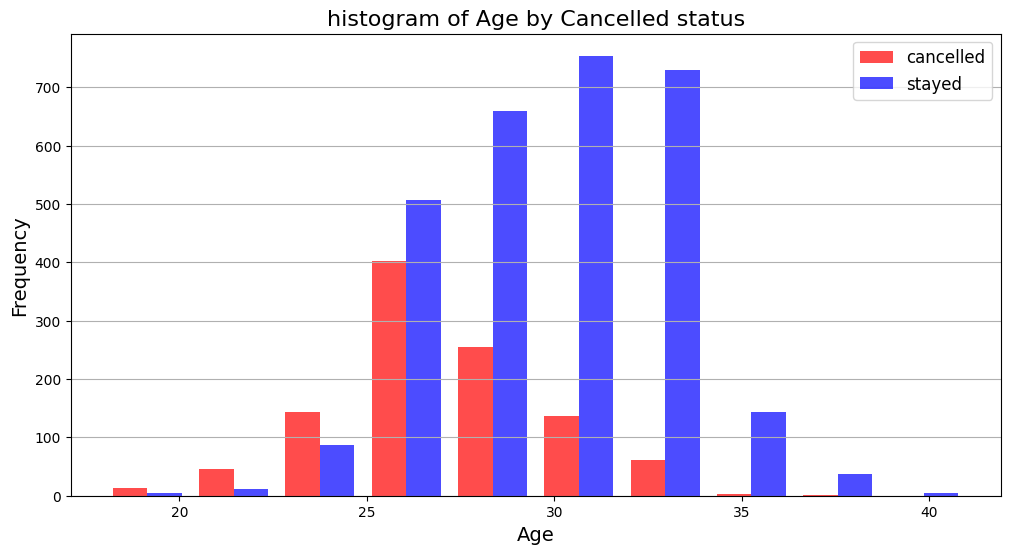

In [9]:
plt.figure(figsize=(12,6))
plt.hist([df[df['Churn']==1]['Age'],df[df['Churn']==0]['Age']],alpha=0.7,label=['cancelled','stayed'],color=['red','blue'])
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('histogram of Age by Cancelled status',fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()

Se visualiza el histograma por edades comparando las personas que se fueron y se quedaron

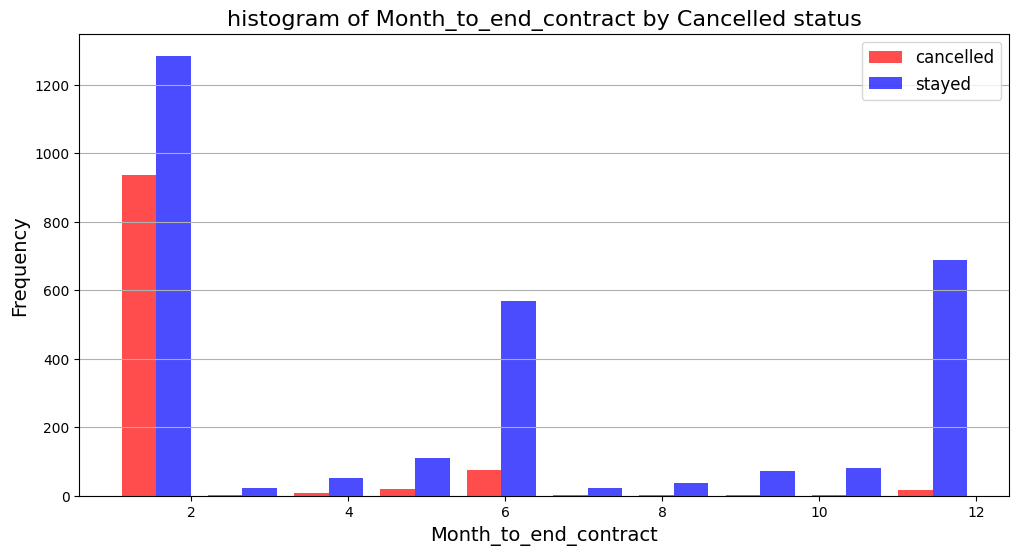

In [10]:
plt.figure(figsize=(12,6))
plt.hist([df[df['Churn']==1]['Month_to_end_contract'],df[df['Churn']==0]['Month_to_end_contract']],alpha=0.7,label=['cancelled','stayed'],color=['red','blue'])
plt.xlabel('Month_to_end_contract',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('histogram of Month_to_end_contract by Cancelled status',fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()

Se analiza el mes de finalizacion del contrato

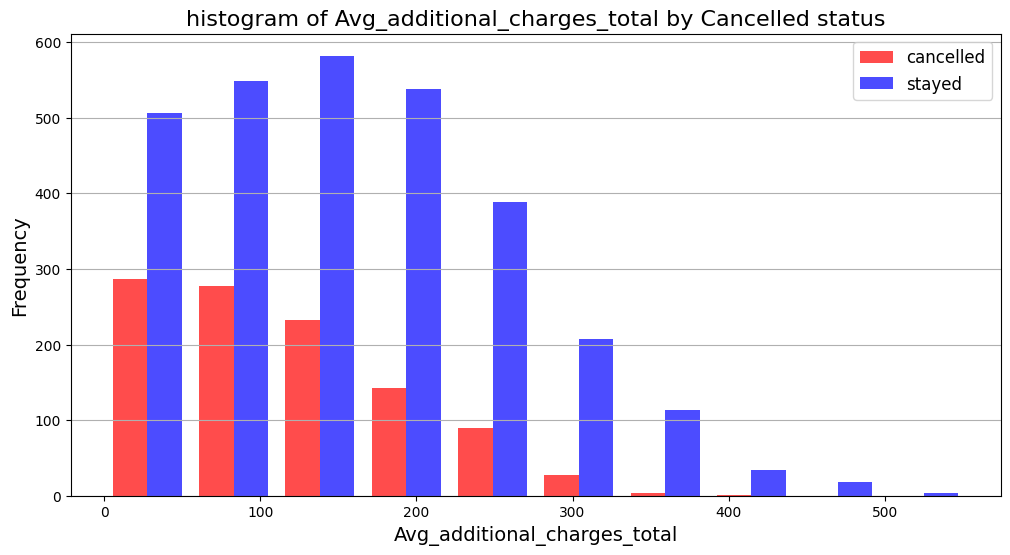

In [11]:
plt.figure(figsize=(12,6))
plt.hist([df[df['Churn']==1]['Avg_additional_charges_total'],df[df['Churn']==0]['Avg_additional_charges_total']],alpha=0.7,label=['cancelled','stayed'],color=['red','blue'])
plt.xlabel('Avg_additional_charges_total',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('histogram of Avg_additional_charges_total by Cancelled status',fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()

Se muestra el promedio de cargos adidicionales de las personas que se fueron y se quedaron

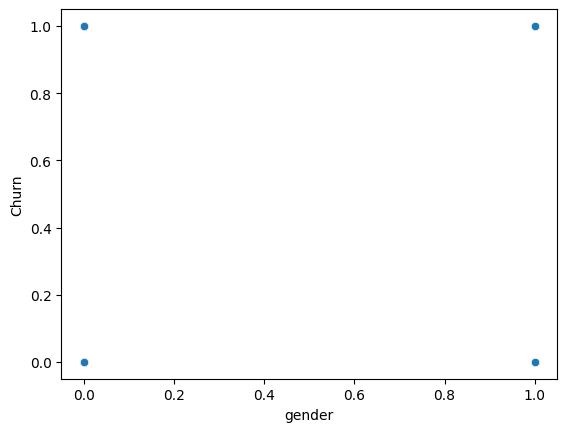

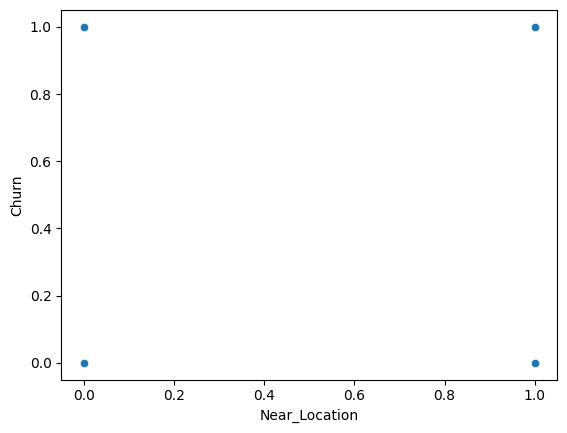

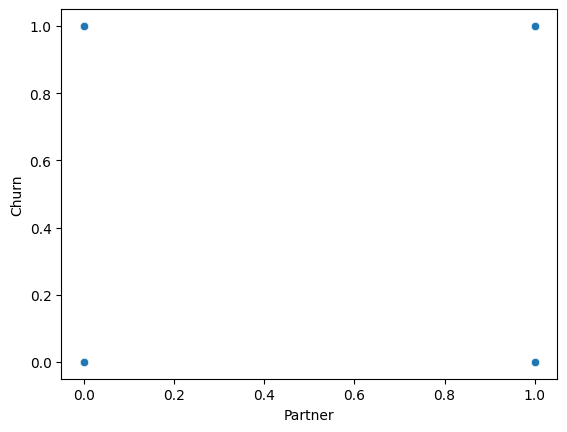

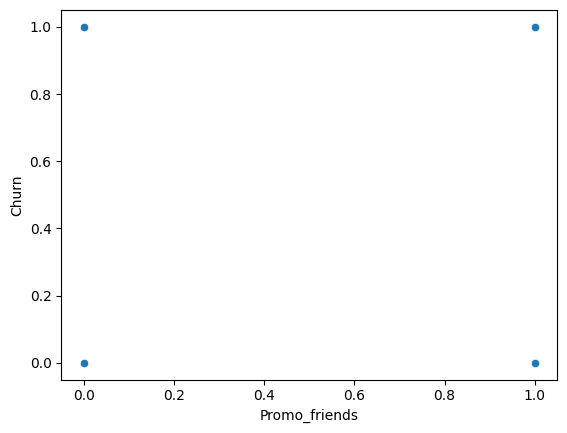

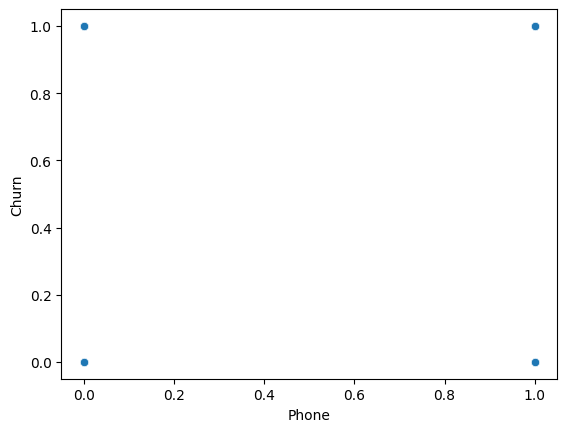

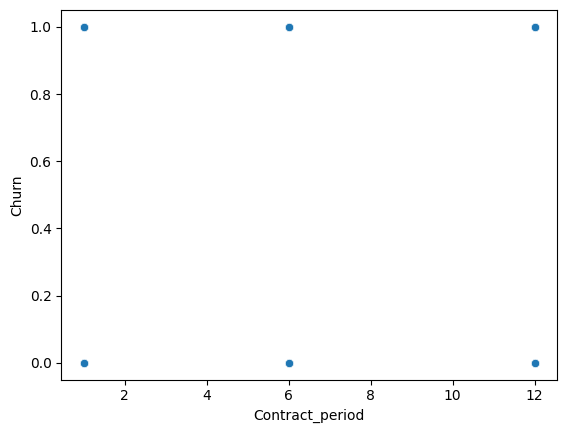

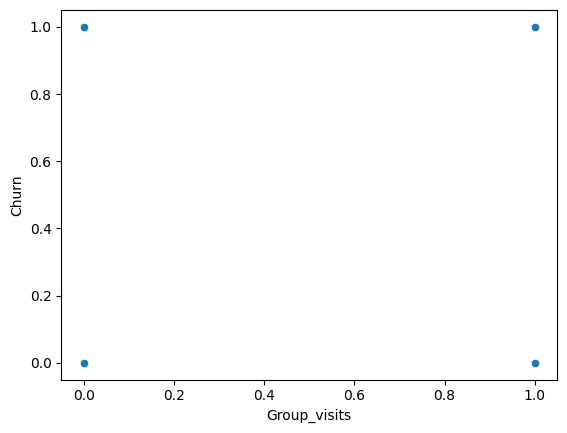

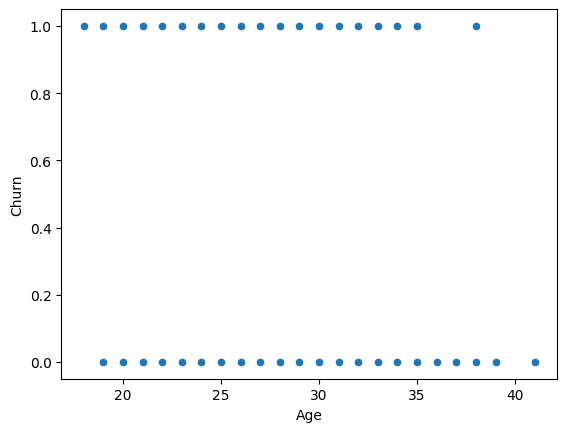

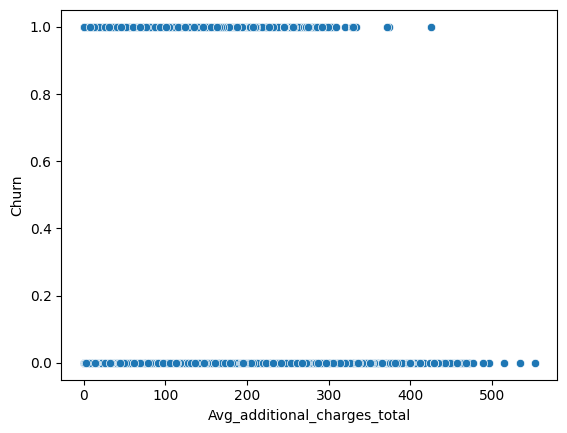

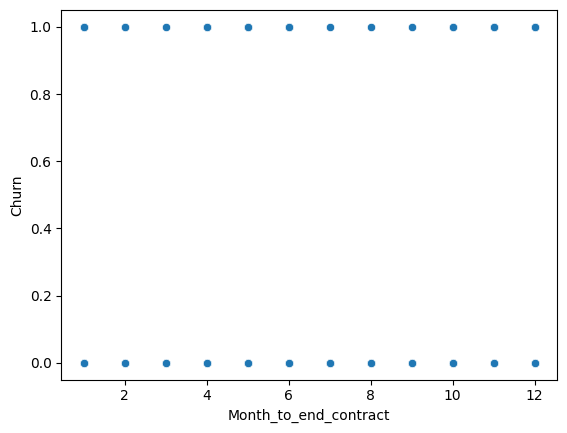

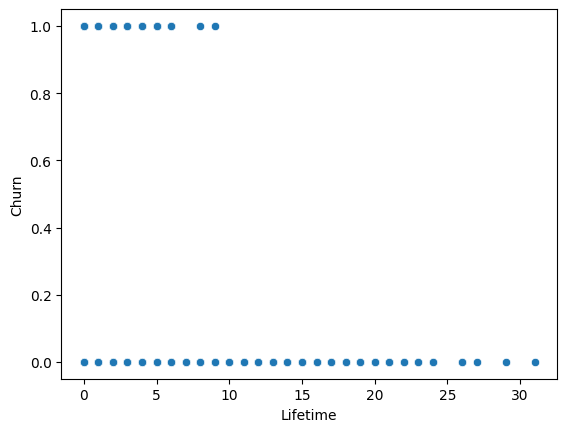

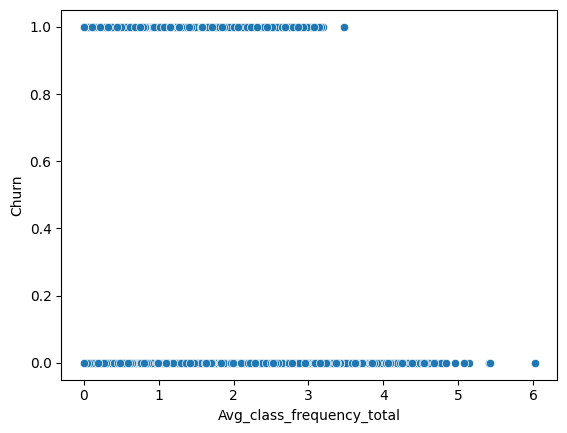

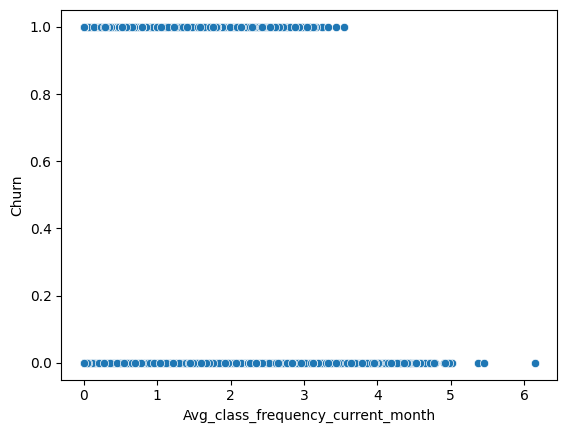

In [12]:
for df_new in df.drop('Churn', axis=1).columns:
    sns.scatterplot(x=df[df_new], y=df['Churn'])
    plt.show()

Se visualizan la distribucion de características para aquellas personas que se fueron (cancelación) y para las que se quedaron

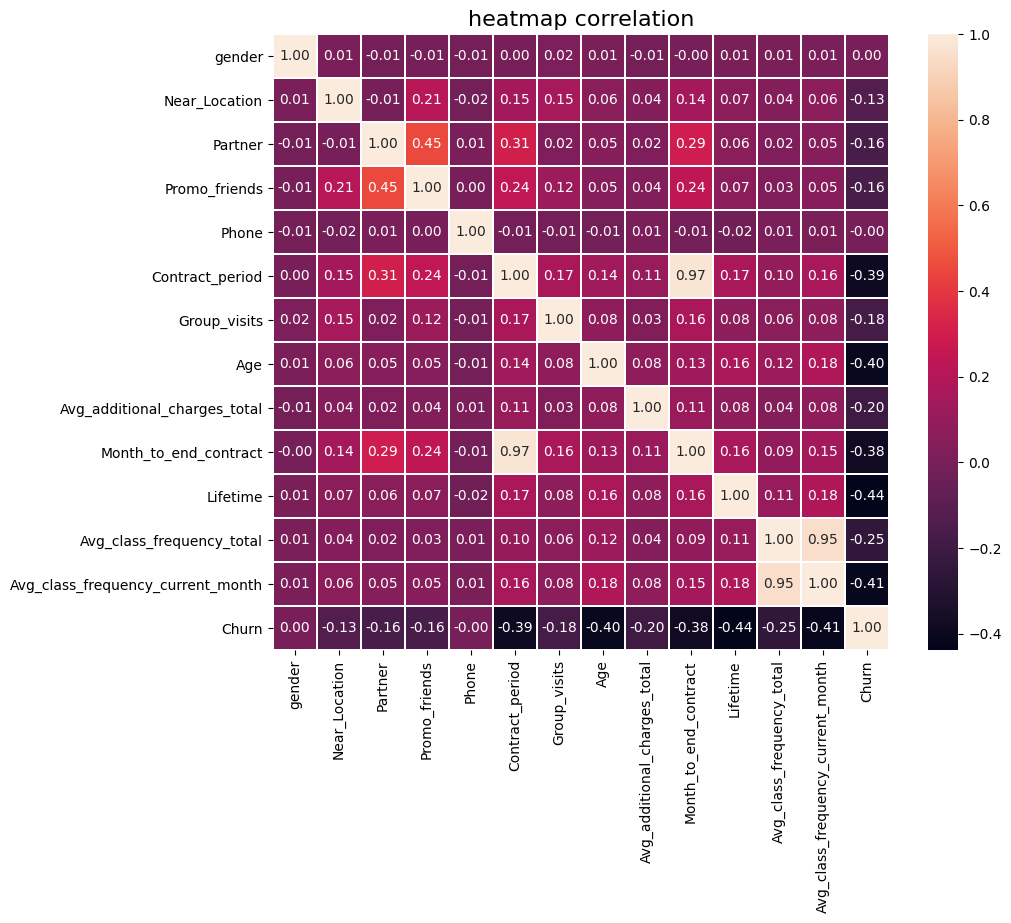

In [13]:
corrm = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrm, annot = True, square=True,fmt=".2f",linewidths=0.5,linecolor='white')
plt.title('heatmap correlation',fontsize=16)
plt.show()

Se grafica el mapa de calor de la correlacion de cada una de las caracteristicas

In [14]:
X=df.drop(columns=['Churn'])
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Se dividen los datos en conjuntos de entrenamiento , lo cual nos permite evaluar el modelo lo que nos proporciona una estimacion objetiva en su rendimiento

In [15]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st =  scaler.transform(X_test)

Se estandarizan los datos,debido a que funcionan mejor cuando las caracteristicas tienen una escala similar 

In [16]:
models = [LogisticRegression(),RandomForestClassifier()]

In [17]:
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i)for i in y_error]
    perc_error_abs = y_error_abs/ y_true
    mape = (perc_error_abs.sum()/len(y_true))
    return mape

Se calcula el error absoluto medio porcentual, MAPE , lo  cual nos permite evaluar la precision de un modelo de pronostico.

In [18]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Exactitud:{:.2f} Precisión:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                          precision_score(y_test, y_pred),
                                                                    recall_score (y_test, y_pred)))
                                                        

Se entrenan los modelos , para ajustar los parametros con el fin de hacer la prediccion precisa

In [19]:
for pronostico in models:
    print(pronostico)
    make_prediction(m=pronostico,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)

LogisticRegression()
Exactitud:0.93 Precisión:0.91 Recall:0.84
RandomForestClassifier()
Exactitud:0.92 Precisión:0.89 Recall:0.79


El mejor modelo a utilizar de acuerdo a los datos seria regresion logistica, debido a que en exactitud el modelo esta clasificando mejor la mayoria de las muestras, en precision esta indicando que la mayoria de las predicciones son correctas , esta capturando la mayoria de las muestras positivas

In [20]:
sc = StandardScaler()
x_sc= X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')

Se estandarizan los datos,debido a que funcionan mejor cuando las caracteristicas tienen una escala similar 

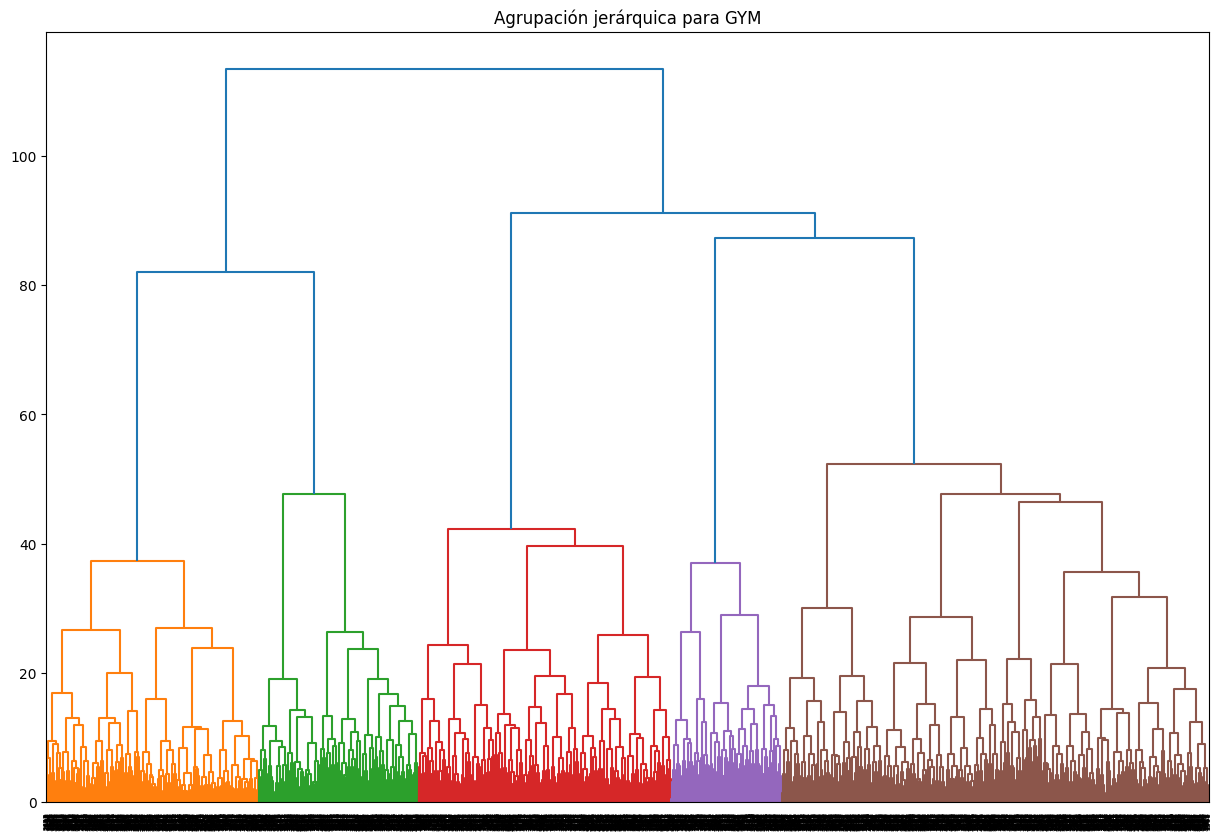

In [21]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

Se crea una matriz de distancias basada en la matriz de características estandarizada y se traza un dendrograma

In [22]:
km =  KMeans(n_clusters = 5)
labels =  km.fit_predict(x_sc)
df['cluster_km'] = labels
df.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.477193,0.824561,0.459649,0.264327,1.000000,2.761404,0.385965,30.028070,151.348090,2.552047,4.688889,1.157304,1.155556,0.001170
1,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
2,0.503650,0.938478,0.767466,0.563087,1.000000,11.199166,0.558916,29.880083,162.792871,10.254432,4.683003,2.031016,2.025194,0.015641
3,0.546929,0.844728,0.367323,0.209733,0.998841,2.676709,0.436848,29.988413,160.879827,2.469293,4.600232,2.904467,2.912142,0.006952
4,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780


Se definen los clusters y se visualiza que el cluster 1 tiene datos ajustados y precisos para analizar, por ejemplo que estan mas cerca a la ubicacion del gimnasio, que en su mayoria trabajan en una empresa aliada, que aproximadamente la mitad aprovecho la oferta de traer a un amigo.

In [23]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (7,7))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

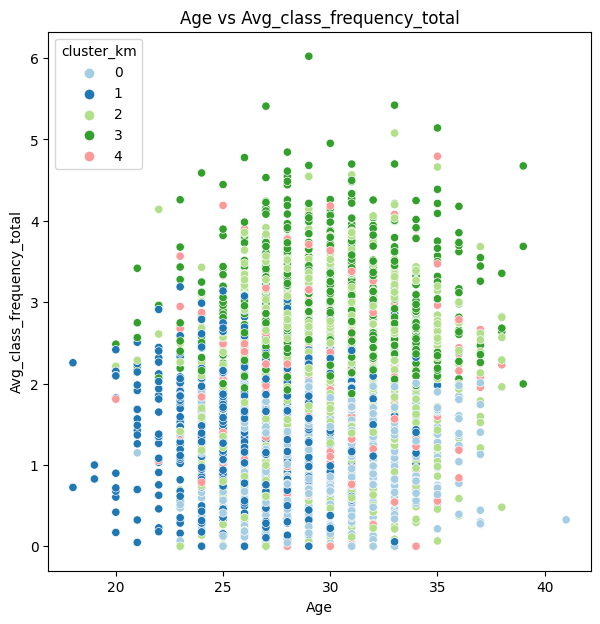

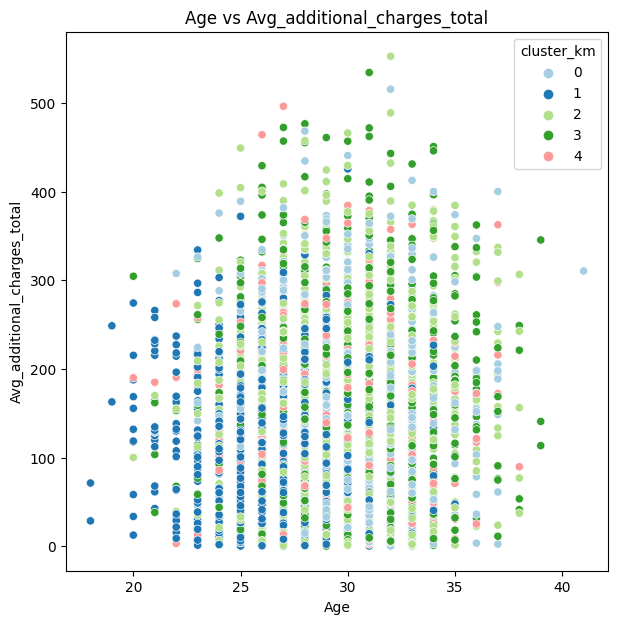

In [24]:
show_clusters_on_plot(df,'Age', 'Avg_class_frequency_total', 'cluster_km')
show_clusters_on_plot(df,'Age', 'Avg_additional_charges_total', 'cluster_km')



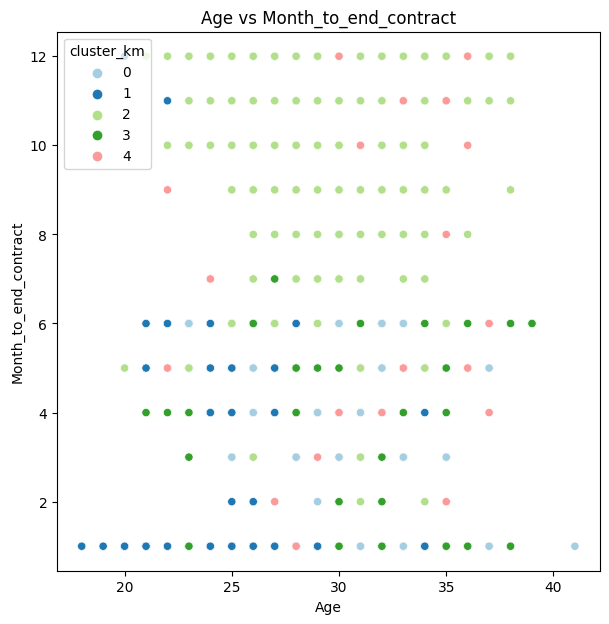

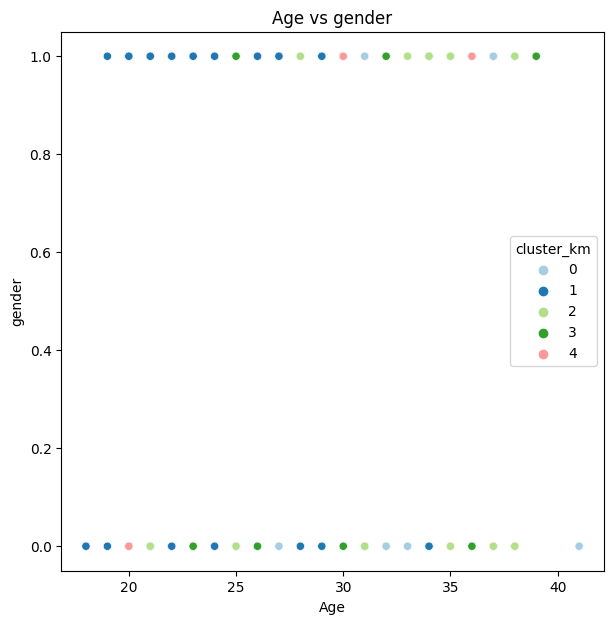

In [25]:
show_clusters_on_plot(df,'Age', 'Month_to_end_contract', 'cluster_km')
show_clusters_on_plot(df,'Age', 'gender', 'cluster_km')



In [26]:
tasa_cancelation=df.groupby('cluster_km')['Churn'].mean()
print(tasa_cancelation)

cluster_km
0    0.001170
1    0.997875
2    0.015641
3    0.006952
4    0.261780
Name: Churn, dtype: float64


El cluster 0 tiene la tasa de cancelacion mas baja mientras que el cluster 4 tiene la tasa de cancelacion mas alta.

Conclusiones:
  *Las personas dependiendo de su edad tienen un comportamiento similar, por lo general buscan un gimnasio cerca pa un facil acceso.
  *Sacar promociones para que las personas se suscriban a periodos mayores de 6 meses, y hacer actividades de retencion.
  *Promover la asistencia a clases grupales para que los usuarios tengan mayor motivacion y sigan con la asistencia continua.